## Enriquecimento com API do Google Maps

### Objetivo:
Nesta etapa, validamos o **enriquecimento de dados** realizado através da **Google Maps API**, que calcula a distância (em quilômetros) entre a residência do aluno e a faculdade.

---

### Verificações principais:
- Verificar se a coluna `distancia_residencia_faculdade` foi gerada corretamente.  
- Analisar a **distribuição das distâncias**.  
- Identificar **outliers** (distâncias muito altas ou nulas).  
- Calcular **médias por curso ou turno** para entender padrões de deslocamento.

---

> *Essa etapa é essencial, pois a distância pode ser um dos fatores que mais influenciam na evasão dos alunos.*


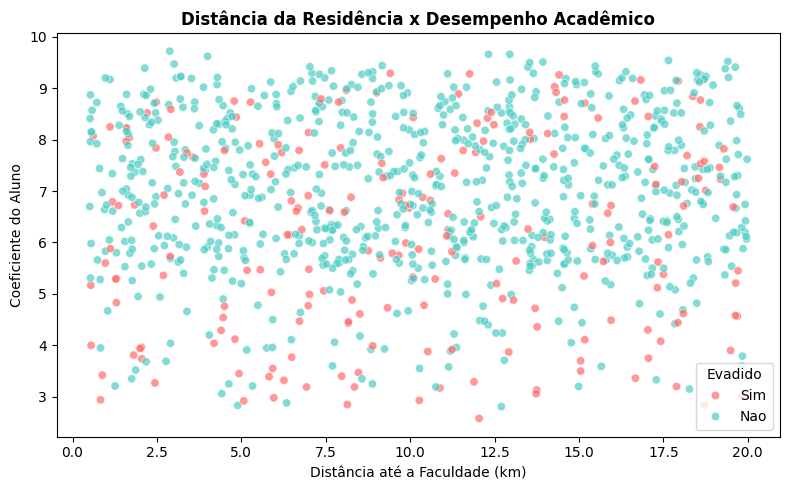

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_parquet("../data/tmp/enriched.parquet")

# Remove linhas sem distância e garante tipo numérico
df = df.dropna(subset=["distancia_residencia_faculdade"])
df["distancia_residencia_faculdade"] = pd.to_numeric(
    df["distancia_residencia_faculdade"], errors="coerce"
)

plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df,
    x="distancia_residencia_faculdade",
    y="coeficiente_aluno",
    hue="evadido",
    palette={"Sim": "#ff6b6b", "Nao": "#4ecdc4"},
    alpha=0.7
)
plt.title("Distância da Residência x Desempenho Acadêmico", fontsize=12, weight="bold")
plt.xlabel("Distância até a Faculdade (km)")
plt.ylabel("Coeficiente do Aluno")
plt.legend(title="Evadido", loc="best")
plt.tight_layout()
plt.show()
